In [1]:
import ginsim
import biolqm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This notebook has been executed using the docker image `colomoto/colomoto-docker:2022-07-01`

## Loading and visualizing the network

In [2]:
MacPol = ginsim.load("MacPol Extended model.zginml")
print('Figure 1. The macrophage polarization model.')
# ginsim.show(gs_model) --> This command does not show all colors from the original GINsim Model, therefore an image is shown instead.

Figure 1. The macrophage polarization model.


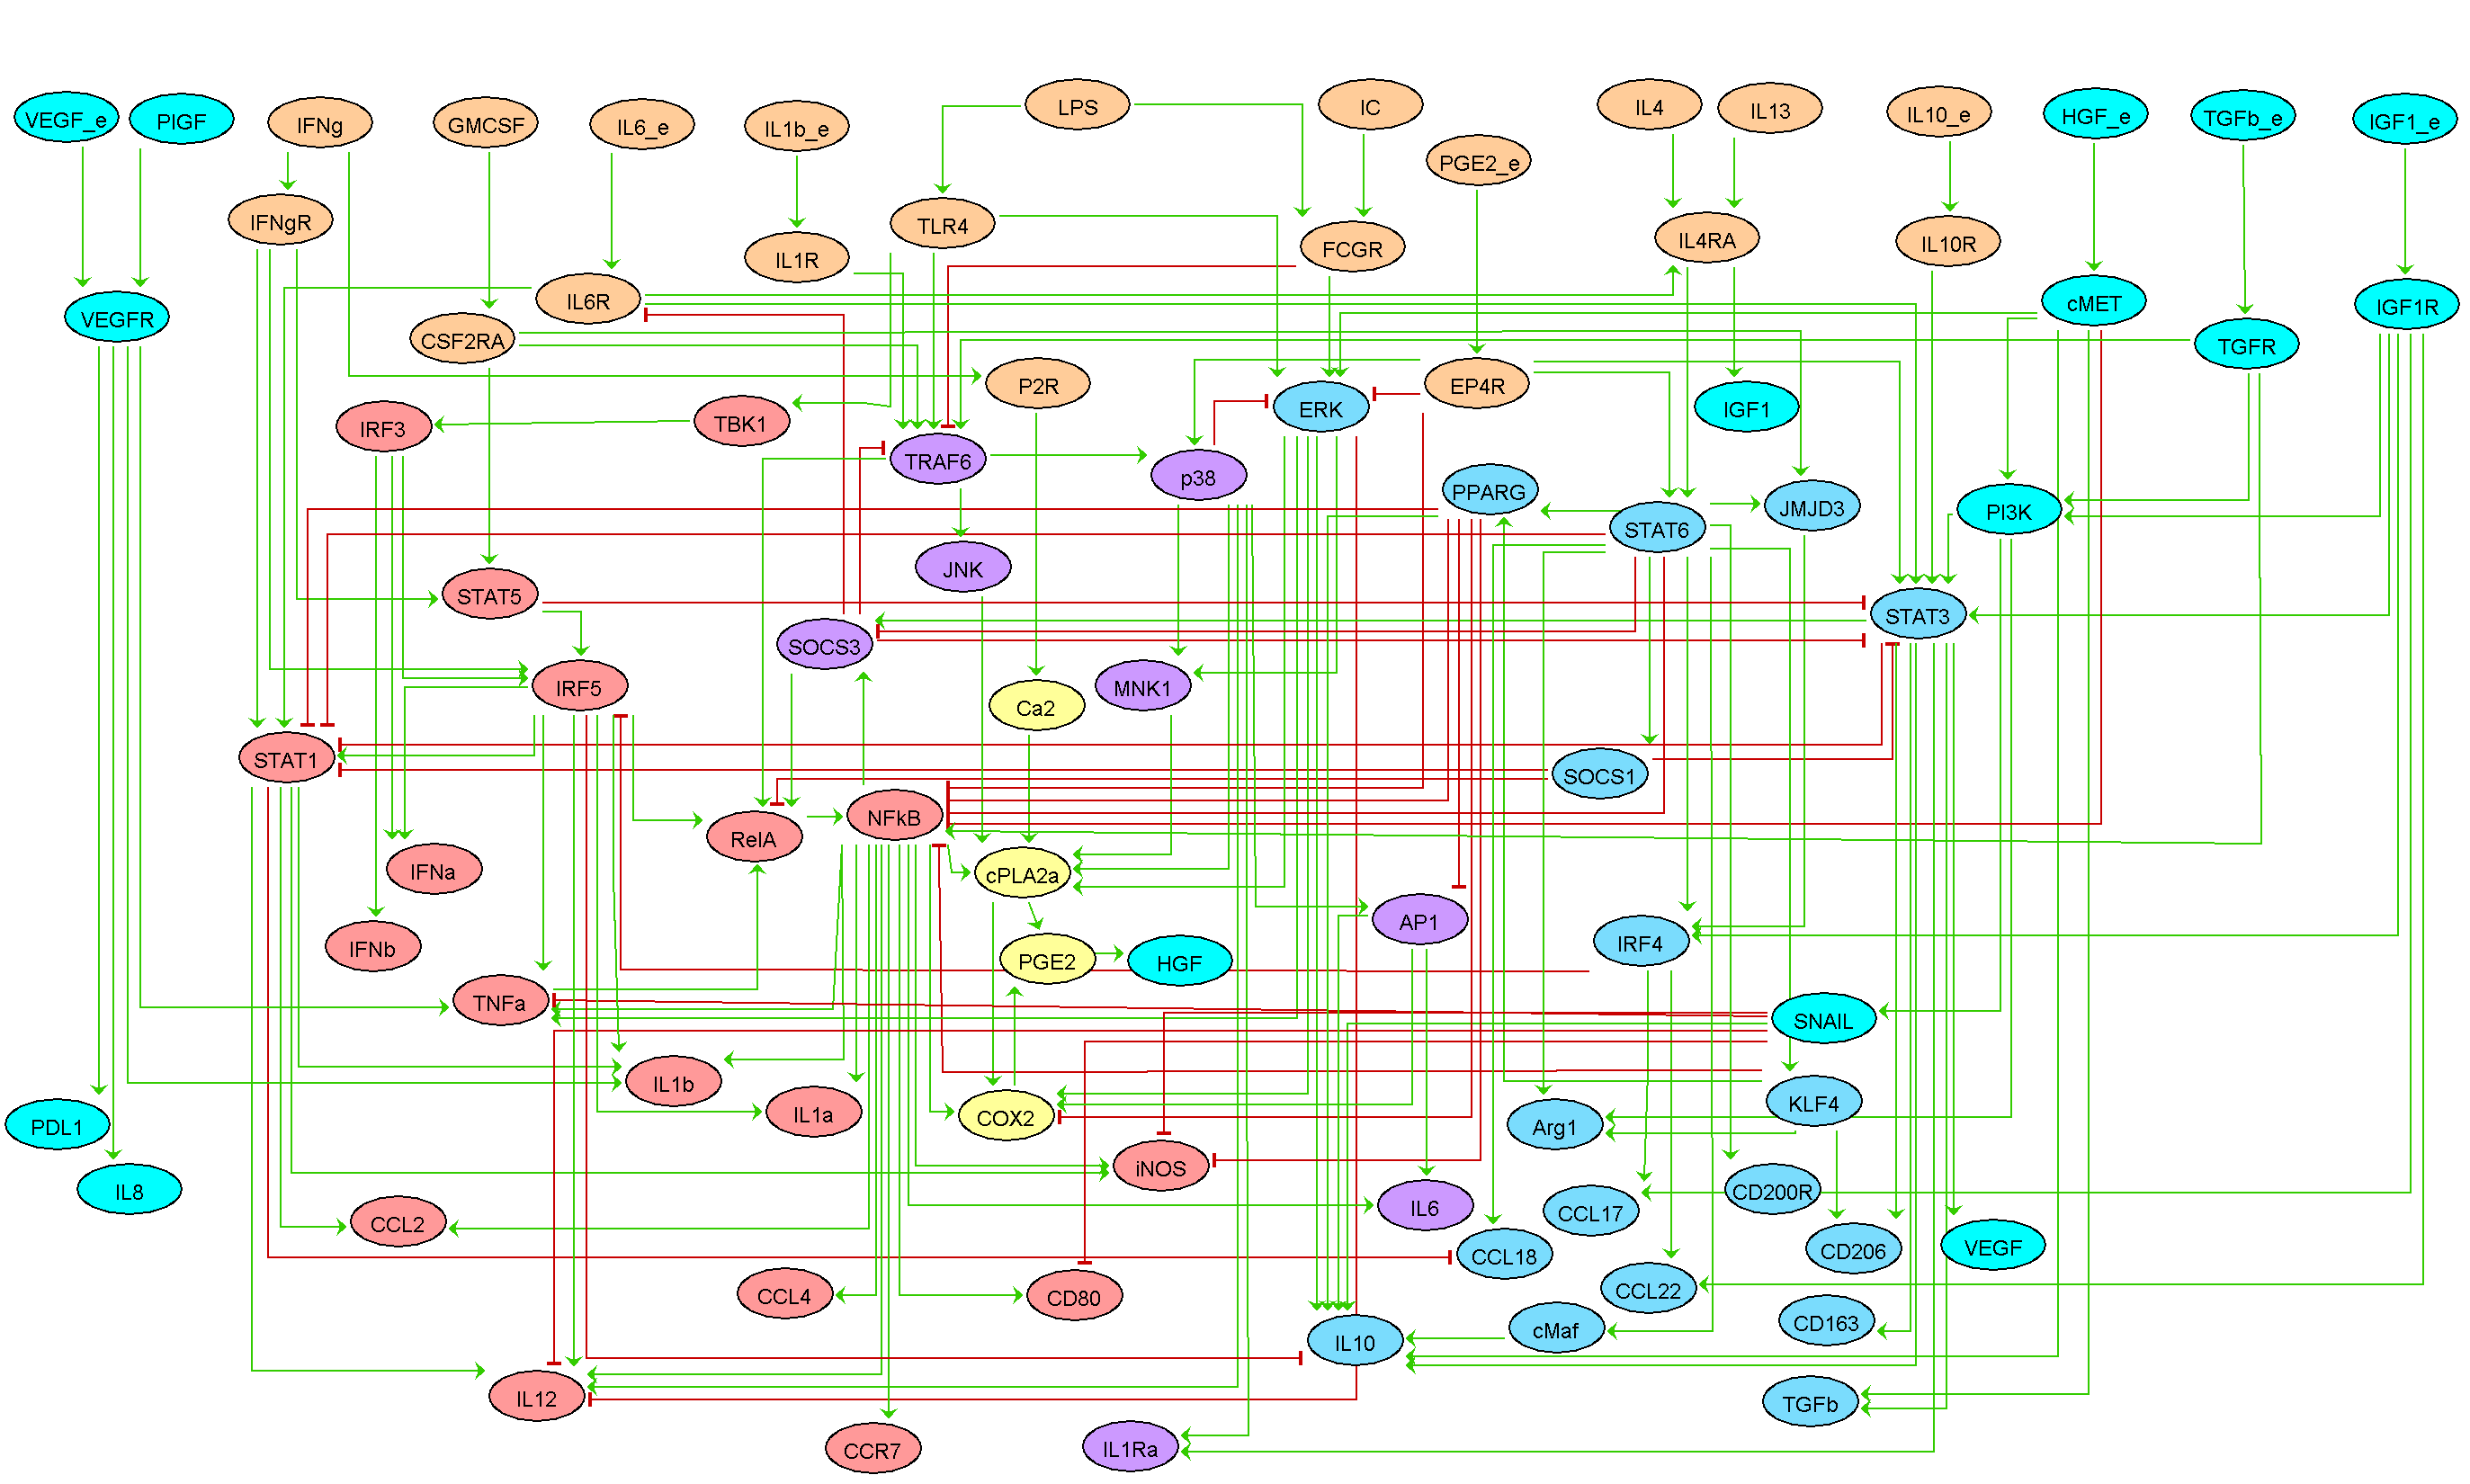

Converting the model to biolqm and pint compliant models:

In [3]:
lqm_model = ginsim.to_biolqm(MacPol)
pint_model = biolqm.to_pint(lqm_model)

Obtaining a summary of the general model properties:

In [4]:
pint_model.summary()

{'nb_automata': 84,
 'nb_local_states': 168,
 'max_local_states': 2,
 'nb_transitions': 258,
 'nb_states': 19342813113834066795298816}

nb_automata signifies the number of nodes,
nb_local_states is the sum of the number of local states in each automaton,
max_local_states gives the number of local states of the largest automaton,
nb_transitions is the number of defined local transitions,
and nb_states is the total number of global states (corresponds to 2<sup>84</sup> in this case).

## Identification of stable states using bioLQM

The original MacPol model developed by Viviam Bérmudez Paiva, has here been extended to include intracellular and extracellular effects of growth factors. This is due to the wish of identifying the stable states for when growth factors are present in the extracellular environment, along with stimuli for polarizing the macrophages into a phenotype, identical to what was performed in the THP-1 experiments.

In [ ]:
# Computing all stable states
fixpoints = biolqm.fixpoints(lqm_model)
fix_df = pd.DataFrame(fixpoints)
fix_df

In [ ]:
# Creating initial state conditions:
inpM1 = ('IFNg = "1", LPS = "1", VEGF_e = "0", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "0", IL13 = "0", IL10_e = "0", HGF_e = "0", TGFb_e = "0", IGF1_e = "0" ')
inpM1_HGF = ('IFNg = "1", LPS = "1", VEGF_e = "0", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "0", IL13 = "0", IL10_e = "0", HGF_e = "1", TGFb_e = "0", IGF1_e = "0" ')
inpM1_VEGF = ('IFNg = "1", LPS = "1", VEGF_e = "1", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "0", IL13 = "0", IL10_e = "0", HGF_e = "0", TGFb_e = "0", IGF1_e = "0" ')
inpM1_PlGF = ('IFNg = "1", LPS = "1", VEGF_e = "0", PlGF = "1", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "0", IL13 = "0", IL10_e = "0", HGF_e = "0", TGFb_e = "0", IGF1_e = "0" ')
inpM1_TGFb = ('IFNg = "1", LPS = "1", VEGF_e = "0", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "0", IL13 = "0", IL10_e = "0", HGF_e = "0", TGFb_e = "1", IGF1_e = "0" ')
inpM1_IGF1 = ('IFNg = "1", LPS = "1", VEGF_e = "0", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "0", IL13 = "0", IL10_e = "0", HGF_e = "0", TGFb_e = "0", IGF1_e = "1" ')

inpM2 = ('IFNg = "0", LPS = "0", VEGF_e = "0", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "1", IL13 = "1", IL10_e = "0", HGF_e = "0", TGFb_e = "0", IGF1_e = "0" ')
inpM2_HGF = ('IFNg = "0", LPS = "0", VEGF_e = "0", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "1", IL13 = "1", IL10_e = "0", HGF_e = "1", TGFb_e = "0", IGF1_e = "0" ')
inpM2_VEGF = ('IFNg = "0", LPS = "0", VEGF_e = "1", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "1", IL13 = "1", IL10_e = "0", HGF_e = "0", TGFb_e = "0", IGF1_e = "0" ')
inpM2_PlGF = ('IFNg = "0", LPS = "0", VEGF_e = "0", PlGF = "1", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "1", IL13 = "1", IL10_e = "0", HGF_e = "0", TGFb_e = "0", IGF1_e = "0" ')
inpM2_TGFb = ('IFNg = "0", LPS = "0", VEGF_e = "0", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "1", IL13 = "1", IL10_e = "0", HGF_e = "0", TGFb_e = "1", IGF1_e = "0" ')
inpM2_IGF1 = ('IFNg = "0", LPS = "0", VEGF_e = "0", PlGF = "0", GMCSF = "0", IL6_e = "0", IL1b_e = "0", IC = "0", PGE2_e = "0", IL4 = "1", IL13 = "1", IL10_e = "0", HGF_e = "0", TGFb_e = "0", IGF1_e = "1" ')

# Preparing indexes for all output nodes
markers = ['IRF3','TBK1','STAT5','IRF5','STAT1','IFNa','RelA','NFkB','IFNb','TNFa','IL1b','IL1a','iNOS','CCL2','CCL4','CD80','IL12','CCR7','TRAF6','JNK','SOCS3','p38','MNK1','AP1','IL6','IL1Ra','ERK','PPARG','STAT6','JMJD3','STAT3','SOCS1','IRF4','Arg1','KLF4','CCL18','CCL17','CD200R','CD206','CCL22','CD163','cMaf','IL10','TGFb', 'PDL1', 'IL8', 'HGF', 'IGF1', 'PI3K','SNAIL', 'VEGF' ]

phen_arrays = [['M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1','M1 & M2','M1 & M2','M1 & M2','M1 & M2','M1 & M2','M1 & M2','M1 & M2','M1 & M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M2', 'M1 & M2', 'M1 & M2', 'M2', 'M1 & M2', 'M1 & M2', 'M2' ], markers]

### Creating initial conditions and computing the corresponding stable states

Workflow for the following cells:
1) Setting the initial states. ".query" in the pandas library asks a boolean expression to each of the columns in the Dataframe.

2) Selecting only the output nodes to appear in heat map.

3) Creating a multilevel index with the phenotypes, which makes it possible to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like dataframes.

In [ ]:
# Setting initial states with growth factors HGF, VEGF, PlGF, TGFb, IGF1 along with M1 phenotype stimuli.
# Selecting only the output nodes.
# Creating a multilevel indexs with the phenotypes.

M1_ON = fix_df.query(inpM1)
M1_ON = M1_ON[markers]
M1_ON.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M1_HGF = fix_df.query(inpM1_HGF)
M1_HGF = M1_HGF[markers]
M1_HGF.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M1_VEGF = fix_df.query(inpM1_VEGF)
M1_VEGF = M1_VEGF[markers]
M1_VEGF.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M1_PlGF = fix_df.query(inpM1_PlGF)
M1_PlGF = M1_PlGF[markers]
M1_PlGF.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M1_TGFb = fix_df.query(inpM1_TGFb)
M1_TGFb = M1_TGFb[markers]
M1_TGFb.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M1_IGF1 = fix_df.query(inpM1_IGF1)
M1_IGF1 = M1_IGF1[markers]
M1_IGF1.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M2_ON = fix_df.query(inpM2)
M2_ON = M2_ON[markers]
M2_ON.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

frames = [M1_ON, M1_HGF, M1_VEGF, M1_PlGF, M1_TGFb, M1_IGF1]
results = pd.concat(frames, keys=["M1", "M1 + HGF", "M1 + VEGF", "M1 + PlGF", "M1 + TGFb", "M1 + IGF1"] 
results.index = results.index.droplevel(1) 

print("Figure 2. Predicted stable states when M1 input ligands IFNg and LPS are on, along with one other growth factor stimuli. ")
fig, ax = plt.subplots(figsize=(30, 6))
                    
title = " Predicted effect of M1 stimuli and growth factors on macrophages. "                   

# Setting the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.8,1.06])
                    
# Removing the axes
ax.axis('off')

sns.heatmap(results, cmap = "Blues", square = False, linewidth=0.1, cbar_kws={"shrink": .1})
plt.show()




In [ ]:
# Setting initial states with growth factors HGF, VEGF, PlGF, TGFb, IGF1 along with M2 phenotype stimuli.
# Selecting only the output nodes.
# Creating a multilevel indexs with the phenotypes.

M2_ON = fix_df.query(inpM2)
M2_ON = M2_ON[markers]
M2_ON.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M2_HGF = fix_df.query(inpM2_HGF)
M2_HGF = M2_HGF[markers]
M2_HGF.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M2_VEGF = fix_df.query(inpM2_VEGF)
M2_VEGF = M2_VEGF[markers]
M2_VEGF.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M2_PlGF = fix_df.query(inpM2_PlGF)
M2_PlGF = M2_PlGF[markers]
M2_PlGF.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M2_TGFb = fix_df.query(inpM2_TGFb)
M2_TGFb = M2_TGFb[markers]
M2_TGFb.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

M2_IGF1 = fix_df.query(inpM2_IGF1)
M2_IGF1 = M2_IGF1[markers]
M2_IGF1.columns = pd.MultiIndex.from_arrays(phen_arrays, names= ['Phenotype', 'Node'])

frames = [M2_ON, M2_HGF, M2_VEGF, M2_PlGF, M2_TGFb, M2_IGF1]
results = pd.concat(frames, keys=["M2", "M2 + HGF", "M2 + VEGF", "M2 + PlGF", "M2 + TGFb", "M2 + IGF1"] 

print("Figure 2. Predicted stable states when M2 input ligands IL-4 and IL-13 are on, along with one other growth factor stimuli. ")
fig, ax = plt.subplots(figsize=(30, 6))

title = " Predicted effect of M2 stimuli and growth factors on macrophages. "                   

# Setting the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.8,1.06])
                    
# Removing the axes
ax.axis('off')

sns.heatmap(results, cmap = "Blues", square = False, linewidth=0.1, cbar_kws={"shrink": .1})
plt.show()

